In [174]:
# Importieren der Bibliotheken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [175]:
# Datensätze laden
ackerfläche=pd.read_csv("ackerfläche intpl.csv")
gast=pd.read_csv("arbeiter gastgewerbe extrplt.csv")
ev=pd.read_excel("Anzahl e-Autos.xlsx")
autos=pd.read_csv("Anzahl Fahrzeuge 60-23 intpl.csv")
tankstellen=pd.read_csv("Anzahl Tankstellen 50-22 intpl.csv")
sektoren=pd.read_csv("Arbeitnehmer nach Sektoren.csv")
ausgaben=pd.read_csv("ausgaben anteil intpl.csv")
bafe=pd.read_csv("bafe intpl.csv")
benzin=pd.read_excel("Benzinpreis 72-23.xlsx")
bip=pd.read_excel("BIP 1959 - 2022 detailliert.xlsx")
braunkohle=pd.read_excel("Braunkohle.xlsx")
bwstrom=pd.read_csv("BW Stromerzeugung.csv", delimiter=";")
co2=pd.read_csv("co2 vorläufig 50-22.csv")
dax=pd.read_excel("Dax 1959 - 23.xlsx")
bevölkerung=pd.read_csv("bevölkerung fill.csv")
diesel=pd.read_csv("dieselpreis intpl.csv")
exim=pd.read_excel("Exporte und Importe 50-22.xlsx")
passagiere=pd.read_excel("flugzeug passagiere.xlsx")
heizöl=pd.read_csv("heizöl intpl.csv")
inflation=pd.read_excel("Inflationsrate 50-22.xlsx")
kleidung=pd.read_csv("kleidungsausgaben extrplt.csv")
kohleverbrauch=pd.read_excel("Kohleverbauch 65 bis 21.xlsx")
koks=pd.read_csv("Braunkohlekoks.csv")
bwneubauten=pd.read_csv("neubauten bw extrplt.csv")
rinder=pd.read_csv("rinderbestand intpl.csv")
schweine=pd.read_csv("schweinebestand intpl.csv")
stau=pd.read_csv("Staulänge intpl.csv")
übernachtung=pd.read_csv("übernachtungen intpl.csv")
zug=pd.read_excel("zugverkehr.xlsx")
index=pd.read_csv("index.csv")

# BIP Variable umdrehen
bip=bip[::-1]

# Liste mit den Variablen erzeugen
df_list = [ackerfläche,
ev,
autos,
tankstellen,
sektoren,
ausgaben,
bafe,
benzin,
bip,
braunkohle,
bwstrom,
co2,
dax,
bevölkerung,
diesel,
exim,
heizöl,
inflation,
kohleverbrauch,
koks,
bwneubauten,
rinder,
schweine,
stau,
gast,
passagiere,
kleidung,
zug,
übernachtung,
index]


# Zusammenführen der Variablen basierend auf der Jahresspalte
merged = pd.merge(df_list[0], df_list[1], on='jahr', how='outer')
for i in range(2, len(df_list)):
    merged = pd.merge(merged, df_list[i], on='jahr', how='outer')

# Sortieren der Daten
merged = merged.sort_values("jahr")

# Umbenennen und überschüssige Datenpunkte rausnehmen
alle_daten=merged
alle_daten=alle_daten[:-2]

# Alle Spalten anzeigen lassen
pd.set_option('display.max_columns', None)


C:\Users\dasil\AppData\Local\Temp\ipykernel_18440\3183089410.py:72: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged = pd.merge(merged, df_list[i], on='jahr', how='outer')


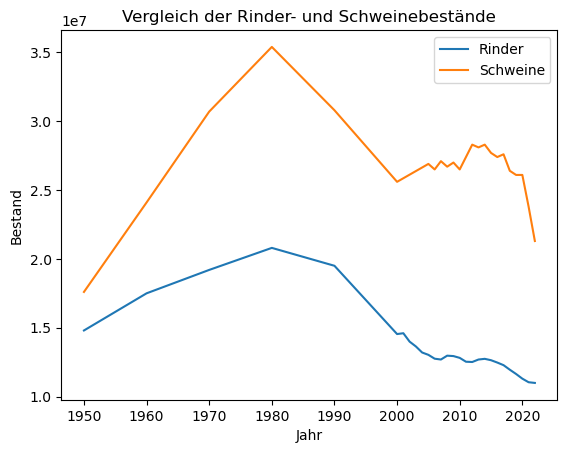

0.6175255283604444

In [100]:
# Vergleich der Bestände von Schweinen und Rindern, um zu beurteilen, ob die Daten redundante sind

# Lineplot erstellen
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['rinderbestand'], data=alle_daten, label='Rinder')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['schweinebestand'], data=alle_daten, label='Schweine')

# Plot erstellen
plt.xlabel('Jahr')
plt.ylabel('Bestand')
plt.title('Vergleich der Rinder- und Schweinebestände')
plt.legend()

# Anzeigen des Plots
plt.show()

# Korrelation der beiden Variablen ausgeben
alle_daten['rinderbestand'].corr(alle_daten['schweinebestand'])

# Heatmap der Tierbestände
# sns.heatmap(alle_daten[['jahr','co2', 'rinderbestand', 'schweinebestand']].corr(), annot=True, linewidths=.5)

# Heatmap mit den landwirtschaftlichen Variablen
# sns.heatmap(alle_daten[['fläche', "rinderbestand", "schweinebestand"]].corr(), annot=True, linewidths=.5)

# Pairplot mit den landwirtschaftlichen Variablen
# sns.pairplot(alle_daten[['fläche', "rinderbestand", "schweinebestand"]])

In [99]:
# Heatmap mit Fläche, Autos, Werte, Anzahl Tankstellen, insgesamt (in 1000)
# sns.heatmap(alle_daten[['jahr','co2', 'fläche', 'autos', 'Werte', 'anzahl tankstellen', 'insgesamt (in 1000)']].corr(), annot=True, linewidths=.5)

# Pairplot mit Fläche, Autos, Werte, Anzahl Tankstellen, insgesamt (in 1000)
# sns.pairplot(alle_daten[['jahr','co2', 'fläche', 'autos', 'Werte', 'anzahl tankstellen',
#        'insgesamt (in 1000)']])

In [101]:
# Heatmap mit Primärsektor (in %), Sekundärsektor (in %), Tertiärsektor (in %), anteil, ausgaben
# sns.heatmap(alle_daten[['jahr','co2', 'Primärsektor (in %)', 'Sekundärsektor (in %)',
#        'Tertiärsektor (in %)', 'anteil', 'ausgaben']].corr(), annot=True, linewidths=.5)

# Pairplot mit Primärsektor (in %), Sekundärsektor (in %), Tertiärsektor (in %), anteil, ausgaben
# sns.pairplot(alle_daten[['jahr','co2', 'Primärsektor (in %)', 'Sekundärsektor (in %)',
#        'Tertiärsektor (in %)', 'anteil', 'ausgaben']])

In [102]:
# Heatmap mit preis, bip (in Mrd), Braunkohle in T, Bruttostromerzeugung\r\nInsgesamt, Steinkohle
# sns.heatmap(alle_daten[['jahr','co2', 'preis', 'bip (in Mrd)',
#        'Braunkohle in T', 'Bruttostromerzeugung\r\nInsgesamt', 'Steinkohle']].corr(), annot=True, linewidths=.5)

# Pairplot mit preis, bip (in Mrd), Braunkohle in T, Bruttostromerzeugung\r\nInsgesamt, Steinkohle
# sns.pairplot(alle_daten[['jahr','co2', 'preis', 'bip (in Mrd)',
#        'Braunkohle in T', 'Bruttostromerzeugung\r\nInsgesamt', 'Steinkohle']])

In [103]:
# Heatmap mit Heizöl, Erdgas, Kernenergie, Erneuerbare\nEnergieträger1), Sonstige\r\nEnergieträger2)
# sns.heatmap(alle_daten[['jahr','co2', 'Heizöl', 'Erdgas', 'Kernenergie', 'Erneuerbare\nEnergieträger1)',
#        'Sonstige\r\nEnergieträger2)']].corr(), annot=True, linewidths=.5)

# Pairplot mit Heizöl, Erdgas, Kernenergie, Erneuerbare\nEnergieträger1), Sonstige\r\nEnergieträger2)
# sns.pairplot(alle_daten[['jahr','co2', 'Heizöl', 'Erdgas', 'Kernenergie', 'Erneuerbare\nEnergieträger1)',
#        'Sonstige\r\nEnergieträger2)']])

In [104]:
# Heatmap mit Erster, Hoch, Tief, Schluss, Veränderung, bevölkerung(in Tsd.)
# sns.heatmap(alle_daten[['jahr','co2', 'Erster', 'Hoch', 'Tief',
#        'Schluss', 'Veränderung', 'bevölkerung(in Tsd.)']].corr(), annot=True, linewidths=.5)

# Pairplot mit Erster, Hoch, Tief, Schluss, Veränderung, bevölkerung(in Tsd.)
# sns.pairplot(alle_daten[['jahr','co2', 'Erster', 'Hoch', 'Tief',
#        'Schluss', 'Veränderung', 'bevölkerung(in Tsd.)']])

In [105]:
# Heatmap mit dieselpreis, Exporte, Importe, heizöl liter, inflation (in %)
# sns.heatmap(alle_daten[['jahr','co2', 'dieselpreis',
#        'Exporte', 'Importe', 'heizöl liter', 'inflation (in %)']].corr(), annot=True, linewidths=.5)

# Pairplot mit dieselpreis, Exporte, Importe, heizöl liter, inflation (in %)
# sns.pairplot(alle_daten[['jahr','co2', 'dieselpreis',
#        'Exporte', 'Importe', 'heizöl liter', 'inflation (in %)']])

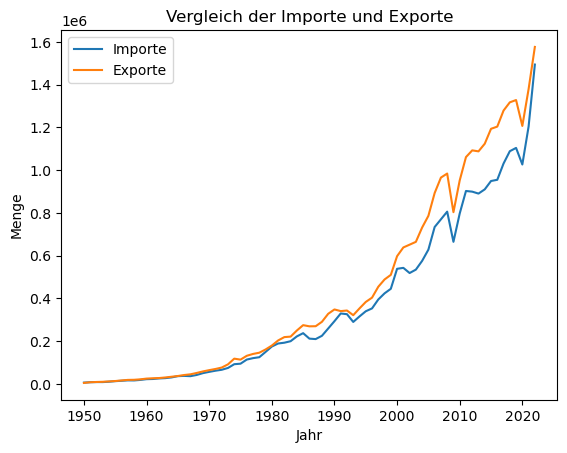

In [203]:
# Vergleich der Importe und Exporte

# Lineplot erstellen
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['Importe'], data=alle_daten, label='Importe')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['Exporte'], data=alle_daten, label='Exporte')

# Plot erstellen
plt.xlabel('Jahr')
plt.ylabel('Menge')
plt.title('Vergleich der Importe und Exporte')
plt.legend()

# Anzeigen des Plots
plt.show()

In [106]:
# Heatmap mit Kohleverbrauch (in exajoule), Braunkohlekoks (in Tsd. Tonnen), neubauten wohnungen, rinderbestand, schweinebestand, Staulänge
# sns.heatmap(alle_daten[['jahr','co2', 'Kohleverbrauch (in exajoule)', 'tonnen koks',
#        'neubauten wohnungen', 'rinderbestand', 'schweinebestand', 'Staulänge']].corr(), annot=True, linewidths=.5)

# Pairplot mit Kohleverbrauch (in exajoule), Braunkohlekoks (in Tsd. Tonnen), neubauten wohnungen, rinderbestand, schweinebestand, Staulänge
# sns.pairplot(alle_daten[['jahr','co2', 'Kohleverbrauch (in exajoule)', 'tonnen koks',
#        'neubauten wohnungen', 'rinderbestand', 'schweinebestand', 'Staulänge']])

In [170]:
# Korrelation der Variablen jahr mit der CO2-Variablen
alle_daten['jahr'].corr(alle_daten['co2'])

-0.08723215419166792

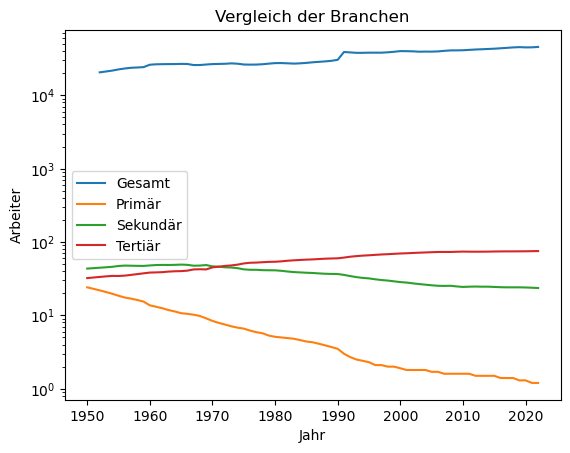

In [95]:
# Vergleich der Arbeiter in verschiedenen Bereichen

# Lineplot erstellen
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['insgesamt (in 1000)'], data=alle_daten, label='Gesamt')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['Primärsektor (in %)'], data=alle_daten, label='Primär')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['Sekundärsektor (in %)'], data=alle_daten, label='Sekundär')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['Tertiärsektor (in %)'], data=alle_daten, label='Tertiär')


# Plot erstellen
plt.xlabel('Jahr')
plt.ylabel('Arbeiter')
plt.title('Vergleich der Branchen')
plt.yscale('log')
plt.legend()

# Anzeigen des Plots
plt.show()

# Pairplot mit Arbeiter (in 1000), Primärsektor (in %), Sekundärsektor (in %), Tertiärsektor (in %)
# sns.pairplot(alle_daten[['Arbeiter (in 1000)', 'Primärsektor (in %)', 'Sekundärsektor (in %)', 'Tertiärsektor (in %)']])

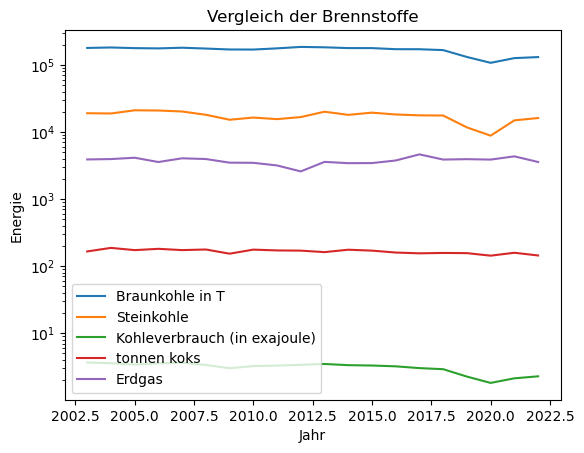

In [110]:
# Vergleich der fossilen Energieträger

# Lineplot erstellen
sns.lineplot(x=alle_daten['jahr'][-20:], y=alle_daten['Braunkohle in T'], data=alle_daten, label='Braunkohle in T')
sns.lineplot(x=alle_daten['jahr'][-20:], y=alle_daten['Steinkohle'], data=alle_daten, label='Steinkohle')
sns.lineplot(x=alle_daten['jahr'][-20:], y=alle_daten['Kohleverbrauch (in exajoule)'], data=alle_daten, label='Kohleverbrauch (in exajoule)')
sns.lineplot(x=alle_daten['jahr'][-20:], y=alle_daten['tonnen koks'], data=alle_daten, label='tonnen koks')
sns.lineplot(x=alle_daten['jahr'][-20:], y=alle_daten['Erdgas'], data=alle_daten, label='Erdgas')


# Plot erstellen
plt.xlabel('Jahr')
plt.ylabel('Energie')
plt.title('Vergleich der Brennstoffe')
plt.yscale('log')
plt.legend()

# Anzeigen des Plots
plt.show()

In [111]:
# Heatmap mit Braunkohle in T, Steinkohle, Heizöl, co2, heizöl liter, tonnen koks, Kohleverbrauch (in exajoule)
# sns.heatmap(alle_daten[['Braunkohle in T', 'Steinkohle',
#        'Heizöl', 'co2', 'heizöl liter','tonnen koks','Kohleverbrauch (in exajoule)']].corr(), annot=True, linewidths=.5)

# Pairplot mit Braunkohle in T, Steinkohle, Heizöl, co2, heizöl liter, tonnen koks, Kohleverbrauch (in exajoule)
# sns.pairplot(alle_daten[['Braunkohle in T', 'Steinkohle',
#        'Heizöl', 'co2', 'heizöl liter','tonnen koks','Kohleverbrauch (in exajoule)']])

In [179]:
# Heatmap mit arbeiter gastgewerbe, passagiere (Tsd.), kleidungsausgaben, bahnkunden, gäste
# sns.heatmap(alle_daten[['co2','arbeiter gastgewerbe', 'passagiere (Tsd.)', 'kleidungsausgaben',
#        'bahnkunden', 'gäste']].corr(), annot=True, linewidths=.5)

# Pairplot mit arbeiter gastgewerbe, passagiere (Tsd.), kleidungsausgaben, bahnkunden, gäste
# sns.pairplot(alle_daten[['co2','arbeiter gastgewerbe', 'passagiere (Tsd.)', 'kleidungsausgaben',
#        'bahnkunden', 'gäste']])

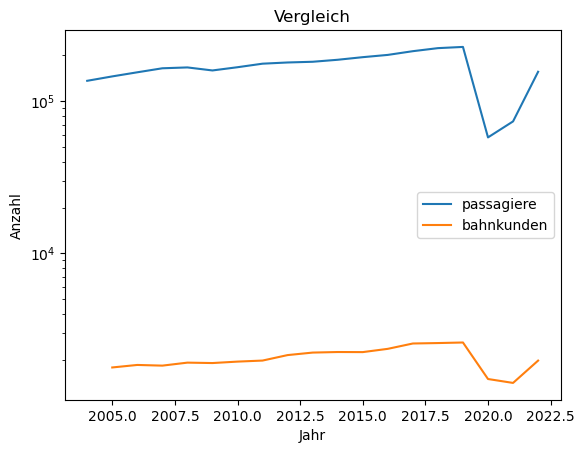

In [115]:
# Vergleich von Diesel und Benzin

# Lineplot erstellen
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['passagiere (Tsd.)'], data=alle_daten, label='passagiere')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['bahnkunden'], data=alle_daten, label='bahnkunden')
# sns.lineplot(x=alle_daten['jahr'], y=alle_daten['kleidungsausgaben'], data=alle_daten, label='kleidungsausgaben')

# Plot erstellen
plt.xlabel('Jahr')
plt.ylabel('Anzahl')
plt.title('Vergleich')
plt.yscale('log')
plt.legend()

# Anzeigen des Plots
plt.show()

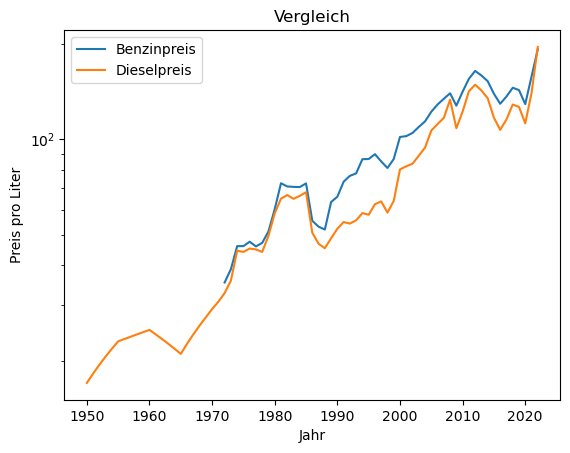

In [333]:
# Vergleich von Diesel und Benzin

# Lineplot erstellen
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['preis'], data=alle_daten, label='Benzinpreis')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['dieselpreis'], data=alle_daten, label='Dieselpreis')

# Plot erstellen
plt.xlabel('Jahr')
plt.ylabel('Preis pro Liter')
plt.title('Vergleich')
plt.yscale('log')
plt.legend()

# Anzeigen des Plots
plt.show()

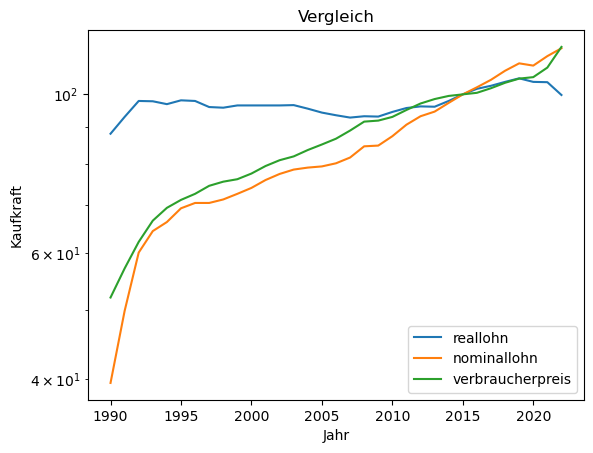

In [36]:
# Vergleich der Kaufkraftindikatoren

# Lineplot erstellen
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['reallohnindex'], data=alle_daten, label='reallohn')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['nominallohnindex'], data=alle_daten, label='nominallohn')
sns.lineplot(x=alle_daten['jahr'], y=alle_daten['verbraucherpreisindex'], data=alle_daten, label='verbraucherpreis')



# Plot erstellen
plt.xlabel('Jahr')
plt.ylabel('Kaufkraft')
plt.title('Vergleich')
plt.yscale('log')
plt.legend()

# Anzeigen des Plots
plt.show()

# Heatmap mit reallohnindex, nominallohnindex, verbraucherpreisindex
# sns.heatmap(alle_daten[['co2', "reallohnindex", "nominallohnindex", "verbraucherpreisindex"]].corr(), annot=True, linewidths=.5)

# Pairplot mit reallohnindex, nominallohnindex, verbraucherpreisindex
# sns.pairplot(alle_daten[['co2',"reallohnindex", "nominallohnindex", "verbraucherpreisindex"]])

In [180]:
# Datensatz ab 1950 beginnen lassen
alle_daten=alle_daten[9:]

# Variablen umbenennen
alle_daten=alle_daten.rename(columns={"fläche": "ackerfläche", "autos": "elektroautos", "Werte": "fahrzeuge", "anteil": "konsumanteil", "ausgaben": "bafe", "Erster": "dax"})

In [181]:
daten1950=alle_daten[['jahr', 'ackerfläche', 'anzahl tankstellen', 'Braunkohle in T',
       'Primärsektor (in %)', 'Sekundärsektor (in %)', 'Tertiärsektor (in %)',
       'konsumanteil', 'bip (in Mrd)', 'co2', 'bevölkerung(in Tsd.)',
       'dieselpreis', 'Importe', 'inflation (in %)', 'neubauten wohnungen',
       'schweinebestand']]
daten1973=alle_daten[['jahr', 'ackerfläche', 'fahrzeuge', 'anzahl tankstellen',
       'Primärsektor (in %)', 'Sekundärsektor (in %)', 'Tertiärsektor (in %)',
       'konsumanteil', 'bip (in Mrd)', 'Braunkohle in T',
       'Steinkohle', 'Heizöl', 'Erdgas',
       'Kernenergie', 'Bruttostromerzeugung Insgesamt', 'Erneuerbarer Energieträger ', 'Sonstige Energieträger', 'co2', 'dax', 'bevölkerung(in Tsd.)',
       'dieselpreis', 'Importe', 'inflation (in %)', 'neubauten wohnungen',
       'schweinebestand']][23:]
daten1990=alle_daten[['jahr', 'ackerfläche', 'fahrzeuge', 'anzahl tankstellen',
       'Primärsektor (in %)', 'Sekundärsektor (in %)', 'Tertiärsektor (in %)',
       'konsumanteil', 'bafe', 'bip (in Mrd)', 'Braunkohle in T',
       'Steinkohle', 'Heizöl', 'Erdgas',
       'Kernenergie', 'Bruttostromerzeugung Insgesamt', 'Erneuerbarer Energieträger ', 'Sonstige Energieträger', 'co2', 'dax', 'bevölkerung(in Tsd.)',
       'dieselpreis', 'Importe', 'inflation (in %)', 'neubauten wohnungen',
       'schweinebestand', 'arbeiter gastgewerbe',
       'kleidungsausgaben', 'gäste', "reallohnindex", "verbraucherpreisindex"]][40:]
daten2006=alle_daten[['jahr', 'ackerfläche', 'elektroautos', 'fahrzeuge', 'anzahl tankstellen',
       'Primärsektor (in %)', 'Sekundärsektor (in %)', 'Tertiärsektor (in %)',
       'konsumanteil', 'bafe', 'bip (in Mrd)', 'Braunkohle in T',
       'Steinkohle', 'Heizöl', 'Erdgas',
       'Kernenergie', 'Bruttostromerzeugung Insgesamt', 'Erneuerbarer Energieträger ', 'Sonstige Energieträger', 'co2', 'dax', 'bevölkerung(in Tsd.)',
       'dieselpreis', 'Importe', 'inflation (in %)', 'neubauten wohnungen',
       'schweinebestand', 'Staulänge', 'arbeiter gastgewerbe',
       'passagiere (Tsd.)', 'kleidungsausgaben', 'bahnkunden', 'gäste', "reallohnindex", "verbraucherpreisindex"]][56:]

In [150]:
# Fehldende Werte überprüfen
# sns.heatmap(daten1950.isnull())

# Heatmap für den Datensaz ab 1950
# plt.figure(figsize=(12, 6))
# sns.heatmap(daten1950.corr(), annot=True)

# Pairplot mit den Variablen mit einer Korrelation unter 0,3
# sns.pairplot(daten1950, x_vars="co2", y_vars=["neubauten wohnungen", "bevölkerung(in Tsd.)", "bip (in Mrd)", "Tertiärsektor (in %)", "Sekundärsektor (in %)"])

# Unwichtige Variablen entfernen
# daten1950_neu= daten1950.drop(["neubauten wohnungen"], axis=1)

# Neue Daten abspeichern
# daten1950_neu.to_csv("daten1950.csv")

In [152]:
# Fehldende Werte überprüfen
# sns.heatmap(daten1973.isnull())

# Heatmap für den Datensaz ab 1973
# plt.figure(figsize=(18, 8))
# sns.heatmap(daten1973.corr(), annot=True)

# Pairplot mit den Variablen mit einer Korrelation unter 0,3
# sns.pairplot(daten1973, x_vars="co2", y_vars=["inflation (in %)", "Kernenergie"])

# Unwichtige Variablen entfernen
# daten1973_neu= daten1973.drop(["inflation (in %)"], axis=1)

# Neue Daten abspeichern
# daten1973_neu.to_csv("daten1973.csv")

In [154]:
# Fehldende Werte überprüfen
# sns.heatmap(daten1990.isnull())

# Heatmap für den Datensaz ab 1990
# plt.figure(figsize=(18, 8))
# sns.heatmap(daten1990.corr(), annot=True)

# Pairplot mit den Variablen mit einer Korrelation unter 0,3
# sns.pairplot(daten1973, x_vars="co2", y_vars=["inflation (in %)"])

# Unwichtige Variablen entfernen
# daten1990_neu= daten1990.drop(["inflation (in %)"], axis=1)

# Neue Daten abspeichern
# daten1990_neu.to_csv("daten1990.csv")

In [156]:
# Fehldende Werte überprüfen
# sns.heatmap(daten2006.isnull())

# Heatmap für den Datensaz ab 2006
# plt.figure(figsize=(22, 10))
# sns.heatmap(daten2006.corr(), annot=True)

# Pairplot mit den Variablen mit einer Korrelation unter 0,3
# sns.pairplot(daten2006, x_vars="co2", y_vars=["gäste", "bahnkunden", "Erdgas"])

# Unwichtige Variablen entfernen
# daten2006_neu= daten2006.drop(["Erdgas"], axis=1)

# Neue Daten abspeichern
# daten2006_neu.to_csv("daten2006.csv")